# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import time
import warnings
warnings.filterwarnings('ignore')
from statistics import mode
from sklearn import metrics 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

# Dataset

In [7]:
df = pd.read_csv("voice.csv")

In [8]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Converting Categorical Values into Numerical Values

In [9]:
df['label'] = [1 if i=='male' else 0 for i in df.label]
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [10]:
x = df.drop(['label'],axis=1)
y = df.label.values

# Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Training

In [15]:
model1 =LogisticRegression(C=10.0,max_iter= 100)
model2 = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
model3= SVC()

start = time.perf_counter()
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
end = time.perf_counter()

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)


final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, mode([pred1[i],pred2[i],pred3[i]]))
int_array = final_pred. astype(int)

cnt=0

for i in range(0,len(x_test)):
    if final_pred[i]!=y_test[i]:
        cnt+=1
ans = ((len(x_test)-cnt)/len(x_test))

print('Accuracy Score:   ',end=" ")
print(metrics.accuracy_score(y_test,final_pred))
print("Time Taken    :    "+str(end-start))

Accuracy Score:    0.9873817034700315
Time Taken    :    0.11357270000000597


# Classification Report

In [33]:
print("Classification Report\n\n")
print(classification_report(y_test, final_pred))

Classification Report


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       297
           1       0.99      0.99      0.99       337

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



In [34]:
accscore = accuracy_score (y_test, final_pred)
recscore = recall_score (y_test, final_pred)
f1score = f1_score (y_test, final_pred)
prescor = precision_score(y_test, final_pred)

In [35]:
print("Accuracy score   : "+str(accscore))
print("Precision score  : "+str(prescor))
print("Recall score     : "+str(recscore))
print("F1 score         : "+str(f1score))

Accuracy score   : 0.9873817034700315
Precision score  : 0.991044776119403
Recall score     : 0.9851632047477745
F1 score         : 0.9880952380952381


# Confusion Matrix

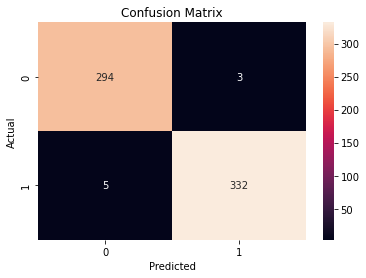

In [36]:
conf_matrix = confusion_matrix(y_test,final_pred)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve

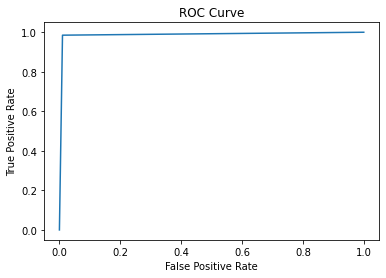

Area Under ROC Curve: 0.9875310973233823


In [37]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, final_pred, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)